# 6장 실습

In [1]:
### Package
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
### 출력 영상 크기
plt.rcParams["figure.figsize"] = (16,9)
### 한글 표시
plt.rcParams['font.family'] = "Gulim"

# ▶ 영상의 특징 분류
## ■ 영상의 특징
- 영상처리에 사용될 수 있는 간결한 정보
- 구조적 특징
    - 이미지 내에서 형태를 표현하기 위한 요소
    - 점, 선, 경계, 코너
- 통계적 특징
    - 밝기값 및 컬러 분포를 통한 판단
    - 히스토그램, 분산

# ▶ 통계적 특징값 추출
## ■ 통계적 특징값
- 영상을 통계적 관점으로 수치화시킨 특징값
- 영상의 전체적 특성을 표현하는 대표값
- 평균, 분산, 히스토그램, 모멘트
- 전역 통계 특징값
    - 영상 전체의 통계적 특징값
- 지역 통계 특징값
    - 영상 부분 부분의 통계적 특징값

# ▶ 구조적 특징값 추출
## ■ 영상 내 구조적 특성을 갖는 모양 정보(구조 정보)를 추출하여 표현
## ■ 선분의 길이, 각도, 연결 관계 등 형태와 관련된 정보를 추출
- 이진화
- 체인 코드
- 골격화
- 코너 검출
- Hough 변환

# ▶ 구조적 특징값 추출 - 이진화
## ■ 오츄(Otsu) 알고리즘
- 영상이 두 클래스(C_0, C_1)의 밝기값을 갖는다.
- 각 클래스가 다른 값으로 군집화되었다고 가정
- 두 클래스를 나눌 수 있는 최적의 임계값 계산

- 클래스 내 분산(intra class variance) 합 최소화
- 클래스 간 분산(inter class variance) 최대화

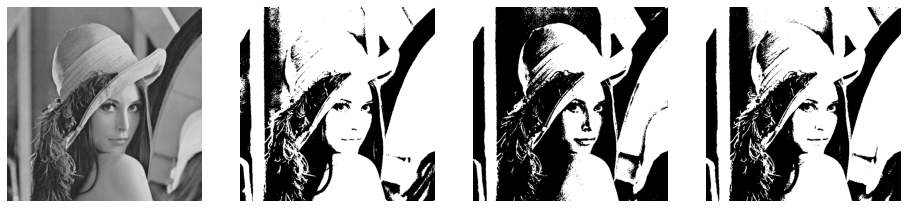

In [3]:
### 영상 읽기 - grayscale
img_lena_gray = cv2.imread(r'C:\Users\sse88\Downloads\lena_color.png', 0)

### 이진화
ret1, th1 = cv2.threshold(img_lena_gray, 100, 255, cv2.THRESH_BINARY)
ret2, th2 = cv2.threshold(img_lena_gray, 127, 255, cv2.THRESH_BINARY)
### Otsu's thresholding
ret3, th3 = cv2.threshold(img_lena_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

### 영상 출력
images = [img_lena_gray, th1, th2, th3]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1,4,i+1), plt.imshow(img_rgb)
    plt.axis('off')
plt.show()

- 파일: noisy2.png

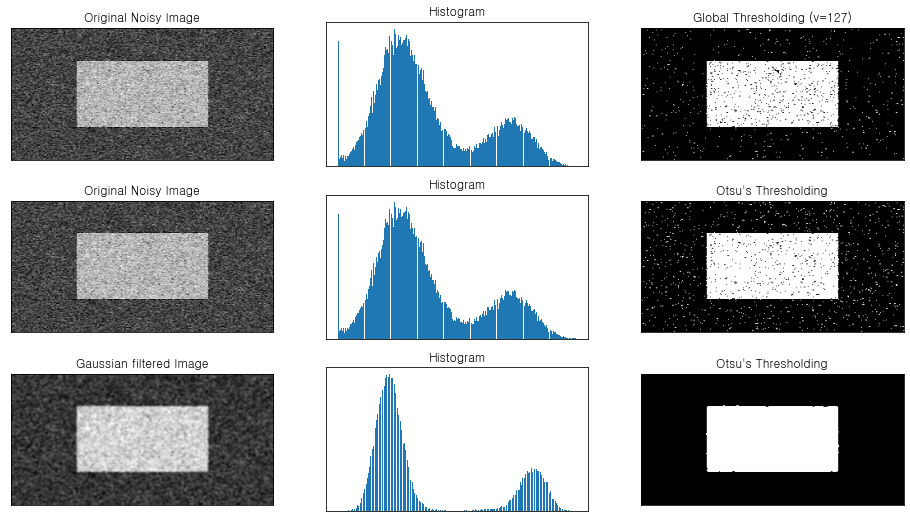

In [6]:
### 파일 - noisy2.png
img_file = r'C:\Users\sse88\Downloads\image_ch6\noisy2.png'

### 영상 읽기 - grayscale
img_noisy2_gray = cv2.imread(img_file, 0)

### global thresholding
ret1, th1 = cv2.threshold(img_noisy2_gray, 127, 255, cv2.THRESH_BINARY)
### Otsu's thresholding
ret2, th2 = cv2.threshold(img_noisy2_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
### Otsu's thresholding after Gaussian filtering
img_noisy2_blur = cv2.GaussianBlur(img_noisy2_gray, (5,5), 0)
ret3, th3 = cv2.threshold(img_noisy2_blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

### 영상 출력 - plot all the images and their histograms
images = [img_noisy2_gray, 0, th1,
          img_noisy2_gray, 0, th2,
          img_noisy2_blur, 0, th3]
titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (v=127)',
          'Original Noisy Image', 'Histogram', "Otsu's Thresholding",
          'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1), plt.imshow(images[i*3], 'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2), plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3), plt.imshow(images[i*3+2], 'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## ■ Adaptive Thresholding
- 영상의 작은 영역별로 이진화
    - cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
        - src: grayscale image
        - maxValue: 임계값을 넘을 때 적용할 값
        - adaptiveMethod: 임계값을 결정하는 방법
            - cv2.ADAPTIVE_THRESH_MEAN_C: 이웃값의 평균에서 상수 C를 뺀 값
            - cv2.ADAPTIVE_THRESH_GAUSSIAN_C: 이웃값의 가우스 가중치 합에서 상수 C를 뺀 값
        - thresholdType: cv2.threshold()의 threshold type
        - blockSize: thresholding을 적용할 영역의 크기
        - C: adaptiveMethod로 계산된 임계값에서 차감할 값

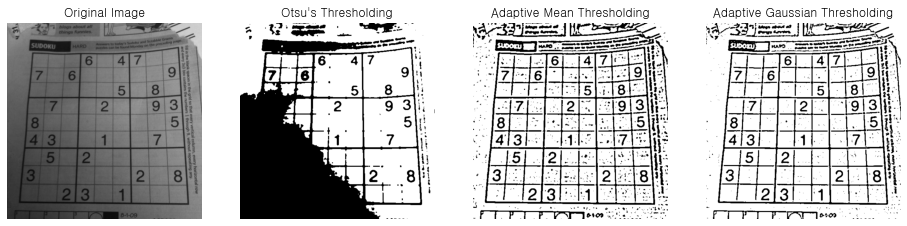

In [9]:
### 파일 - sudoku.png
img_file = r'C:\Users\sse88\Downloads\image_ch6\sudoku.png'

### 영상 읽기 - grayscale
img_sudoku_gray = cv2.imread(img_file, 0)

### 중간값 필터
img_sudoku_median = cv2.medianBlur(img_sudoku_gray, 5)

### Otsu's thresholding
ret, th1 = cv2.threshold(img_sudoku_median, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
### Adaptive Mean Thresholding
th2 = cv2.adaptiveThreshold(img_sudoku_median, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
### Adaptive Gaussian Thresholding
th3 = cv2.adaptiveThreshold(img_sudoku_median, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

### 영상 출력
titles = ['Original Image', "Otsu's Thresholding", 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img_sudoku_gray, th1, th2, th3]
for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.subplot(1,len(images),i+1), plt.imshow(img_rgb)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

# ▶ 구조적 특징값 추출 - 허프 변환
## ■ 영상에서 직선 성분 추출
- 직선의 방정식 모델
    - 기울기와 절편을 파라미터로 하여 표현
    
## ■ 허프공간
- 영상에 존재하는 가능한 모든 기울기와 절편의 공간

## ■ 직선 검출
- 입력 영상 각 점에서 가능한 직선들에 대응되는 기울기와 절편에 투표
- 누적 투표량이 많은 기울기와 절편의 조합을 추출

## ■ 극좌표 기반 직선의 방정식 모델
- 직선의 방정식의 문제점
    - 파라미터 공간이 무한대
    - y = ax + b로 기울기 a와 절편 b를 표현했을 때 a의 범위는 [-∞, +∞]
    - 분할 스케일의 등간격 표현이 힘들다.
    
## ■ 극좌표계
- 직선을 (ρ,θ) 파라미터를 이용해 표현

## ■ 영상의 한 점을 거리와 각도 공간으로 변환
- 등 간격 샘플링
- Hough Line Transform
    - https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html
    - cv2.HoughLines(image, rho, theta, threshold)
    - rho: ρ (픽셀)
    - theta: θ (라디안)
    - threshold: 교차점의 최소값

In [10]:
### 파일 - sudoku.png
img_file = r'C:\Users\sse88\Downloads\image_ch6\sudoku.png'

### 영상 읽기
img_sudoku = cv2.imread(img_file)

### Grayscale
img_sudoku_gray = cv2.cvtColor(img_sudoku, cv2.COLOR_BGR2GRAY)

### Canny edges
img_Canny = cv2.Canny(img_sudoku_gray, 50, 150)

In [12]:
### 출력 영상
img_out = img_sudoku.copy()

### 직선 검출
lines = cv2.HoughLines(img_Canny, 1, np.pi/180, 200)

### 직선 표시
for i in range(len(lines)):
    for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img_out, (x1, y1), (x2, y2), (0, 0, 255), 2)

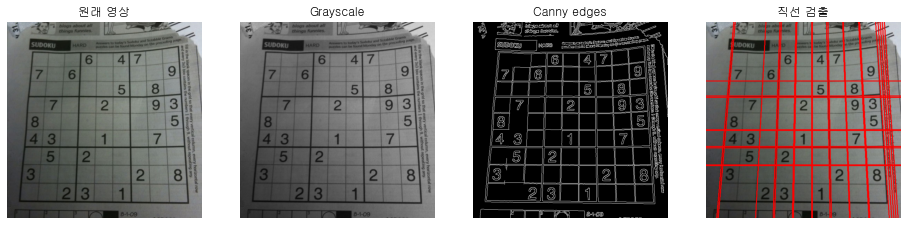

In [13]:
### 영상 출력
titles = ["원래 영상", "Grayscale", "Canny edges", "직선 검출"]
images = [img_sudoku, img_sudoku_gray, img_Canny, img_out]
for i in range(len(images)):
    plt.subplot(1, 4, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.show()

## ■ 확율 허프 변환(Probabilistic Hough Transform)
- 허프 변환은 많은 계산이 필요함
- Hough Transform의 최적화
    - 모든 점을 고려하지 않고 임의의 점 하위 집합만 사용
- cv2.HoughLinesP(image, rho, theta, threshold, minLineLength, maxLineGap)
    - image: 8bit, single-channel binary image
    - rho: ρ (픽셀)
    - theta: θ (라디안)
    - threshold: 교차점의 최소값
    - minLineLength: 선의 최소 길이. 이 값보다 작으면 reject
    - maxLineGap: 선과 선 사이의 최대 허용 간격. 이 값보다 작으면 reject

In [15]:
### 출력 영상
img_out = img_sudoku.copy()

### 직선 검출
lines = cv2.HoughLinesP(img_Canny, 1, np.pi/180, 100, 100, 10)

### 직선 표시
for i in range(len(lines)):
    for x1, y1, x2, y2 in lines[i]:
        cv2.line(img_out, (x1, y1), (x2, y2), (0, 0, 255), 3)

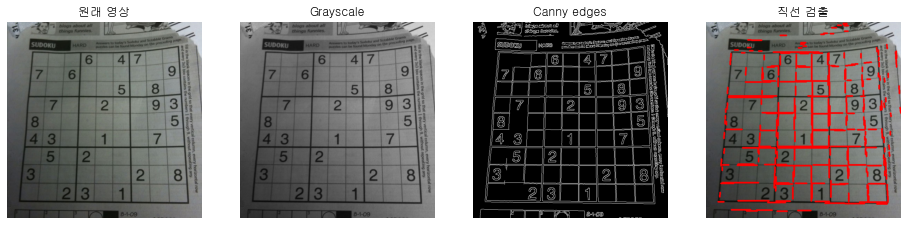

In [16]:
### 영상 출력
titles = ["원래 영상", "Grayscale", "Canny edges", "직선 검출"]
images = [img_sudoku, img_sudoku_gray, img_Canny, img_out]
for i in range(len(images)):
    plt.subplot(1, 4, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.show()

### ● 차선 검출
- 파일: lane.jpg

In [17]:
### 영상 읽기
img_shape = cv2.imread(r'C:\Users\sse88\Downloads\image_ch6\lane.jpg')

### Grayscale
img_shape_gray = cv2.cvtColor(img_shape, cv2.COLOR_BGR2GRAY)

### Canny edges
img_Canny = cv2.Canny(img_shape_gray, 100, 400)

In [18]:
### 직선 검출
lines = cv2.HoughLines(img_Canny, 1, np.pi/180, 200)

### 출력 영상
img_out_1 = img_shape.copy()

### 직선 표시
for i in range(len(lines)):
    for rho, theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img_out_1, (x1, y1), (x2, y2), (0, 0, 255), 2)

In [19]:
### 출력 영상
img_out_2 = img_shape.copy()

### 직선 검출
lines = cv2.HoughLinesP(img_Canny, 1, np.pi/180, 200, maxLineGap=10)

### 직선 표시
for i in range(len(lines)):
    for x1, y1, x2, y2 in lines[i]:
        cv2.line(img_out_2, (x1, y1), (x2, y2), (0, 0, 255), 3)

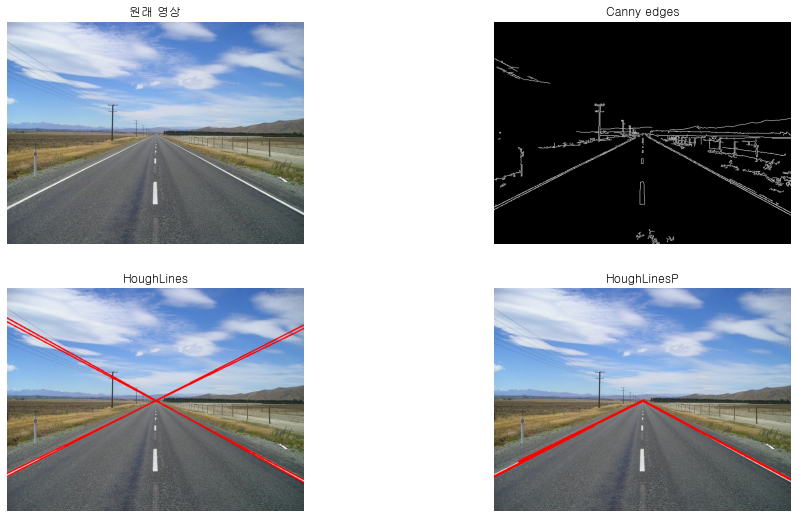

In [20]:
### 영상 출력
titles = ["원래 영상", "Canny edges", "HoughLines", "HoughLinesP"]
images = [img_shape, img_Canny, img_out_1, img_out_2]
for i in range(len(images)):
    plt.subplot(2, 2, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.show()

## ■ 원 검출
- 원의 중심(Xcenter, Ycenter)과 반지름 r
- cv2.HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]])
    - image: 8bit, single-channel binary image
    - method: 검출 방법(HOUGH_GRADIENT 및 HOUGH_GRADIENT_ALT)
    - dp: 출력 해상도 (1: 입력 영상과 동일)
    - minDist: 감지된 원의 중심 사이의 최소 거리
    - param1: 내부적으로 사용하는 canny edge 검출기에 전달되는 parameter
    - param2: 원 중심에 대한 임계값
    - minRadius: 원의 최소 반지름
    - maxRadius: 원의 최대 반지름

In [36]:
### 영상 읽기
img_shape = cv2.imread(r'C:\Users\sse88\Downloads\image_ch6\shapes.png')

### Grayscale
img_shape_gray = cv2.cvtColor(img_shape, cv2.COLOR_BGR2GRAY)

### 원 검출
circles = cv2.HoughCircles(img_shape_gray, cv2.HOUGH_GRADIENT, 1, 5,
                           param1=30, param2=20, minRadius=2, maxRadius=30)

### 원의 중심과 반지름
circles = np.uint16(np.around(circles))
circles

array([[[ 26,  66,  17],
        [ 86, 216,  23],
        [ 28, 116,  13],
        [ 42, 116,  14],
        [ 74, 222,  10],
        [116, 214,  10],
        [ 90,  26,   7],
        [140,  24,   7],
        [128, 212,  14],
        [ 74, 208,  10],
        [ 30, 166,  18],
        [ 74, 216,  15],
        [134, 214,   9],
        [ 70, 214,  17]]], dtype=uint16)

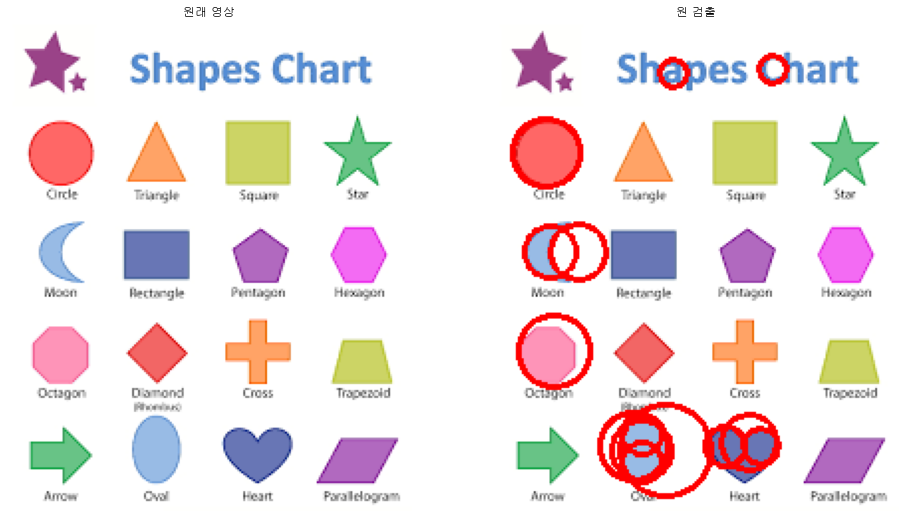

In [37]:
### 출력 영상
img_out = img_shape.copy()

### 원 표시
for cx, cy, radius in circles[0,:]:
    cv2.circle(img_out, (cx, cy), int(radius), (0, 0, 255), 2)

### 영상 출력
titles = ["원래 영상", "원 검출"]
images = [img_shape, img_out]
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.show()

### ● 단추 개수 세기
- 파일: button.jpg

In [57]:
### 영상 읽기
img_button = cv2.imread(r'C:\Users\sse88\Downloads\image_ch6\button.jpg')

### Grayscale
img_button_gray = cv2.cvtColor(img_button, cv2.COLOR_BGR2GRAY)

### 원 검출
circles = cv2.HoughCircles(img_button_gray, cv2.HOUGH_GRADIENT, dp=1, minDist=50,
                           param1=50, param2=20, minRadius=20, maxRadius=30)

### 원의 중심과 반지름
circles = np.uint16(np.around(circles))
circles.shape

(1, 20, 3)

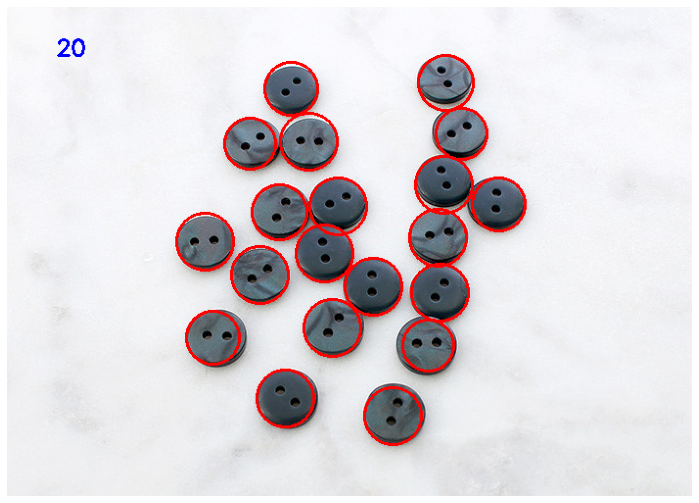

In [58]:
### 출력 영상
img_out = img_button.copy()

### 원 표시
for cx, cy, radius in circles[0,:]:
    cv2.circle(img_out, (cx, cy), int(radius), (0, 0, 255), 2)

### 단추 개수 표시
cv2.putText(img_out, str(circles.shape[1]), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 2)


### 영상 출력
plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### ● 동전 개수 세기
- 파일: coins.png

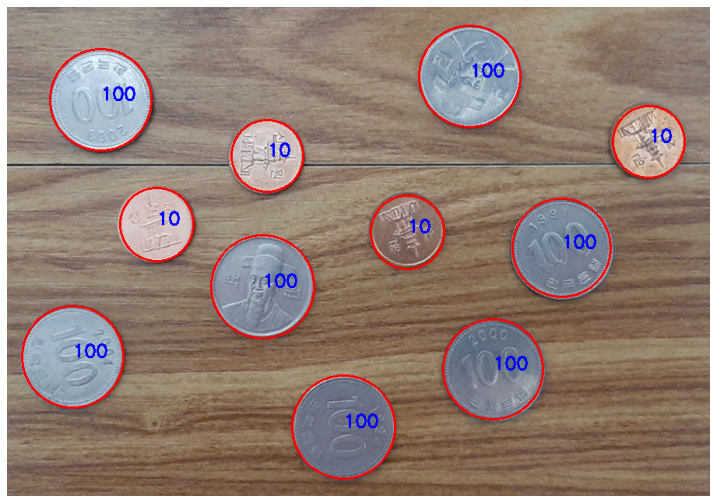

In [58]:
### 영상 읽기
img_coins = cv2.imread(r'C:\Users\sse88\Downloads\image_ch6\coins.png')

### Grayscale
img_coins_gray = cv2.cvtColor(img_coins, cv2.COLOR_BGR2GRAY)

### 원 검출
circles = cv2.HoughCircles(img_coins_gray, cv2.HOUGH_GRADIENT, dp=1, minDist=50,
                           param1=115, param2=45, minRadius=40, maxRadius=70)

### 원의 중심과 반지름
circles = np.uint16(np.around(circles))

### 출력 영상
img_out = img_coins.copy()

### 원 표시
for cx, cy, radius in circles[0,:]:
    cv2.circle(img_out, (cx, cy), int(radius), (0, 0, 255), 2)
    r = int(radius)
    if r > 55:
        n = 100
    else:
        n = 10

    ### 단추 개수 표시
    cv2.putText(img_out, str(n), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 2)


### 영상 출력
plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()